<a href="https://colab.research.google.com/github/andres-merino/Minicurso-ProcesamientoImagenes/blob/main/ProcesamientoImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: 1px solid white;border-collapse: collapse;" >
<tr>
  <td style="width:20%;vertical-align:middle;padding-right: 10;"> <img src="https://i.imgur.com/nt7hloA.png" width="100"> </td>
  <td><p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1; font-weight: bold;">Facultad de Ciencias Exactas y Naturales</p>
    <p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1; font-weight: bold;">Escuela de Verano de Aprendizaje Automático</p>
    <p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1;">Procesamiento y Análisis de imágenes</p>
    <p style="margin: 0; text-align:left; color:#0030A1; font-style: oblique;">Andrés Merino &bull; Septiembre 2024</p>
  </td>  
</tr>
</table>

---
## <font color='264CC7'> Configuración Inicial</font>
---

In [1]:
# Paquetes
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Descargar la imagen
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/andres-merino/Minicurso-ProcesamientoImagenes/main/Imagenes/aurelio.png", "/content/aurelio.png")
urlretrieve("https://raw.githubusercontent.com/andres-merino/Minicurso-ProcesamientoImagenes/main/Imagenes/OsoAurelio.jpg", "/content/OsoAurelio.jpg")

('/content/OsoAurelio.jpg', <http.client.HTTPMessage at 0x796fefcdfd30>)

---
## <font color='264CC7'> Reducción y ampliación de Imágenes</font>
---

Leemos la imagen:

(671, 581, 3)


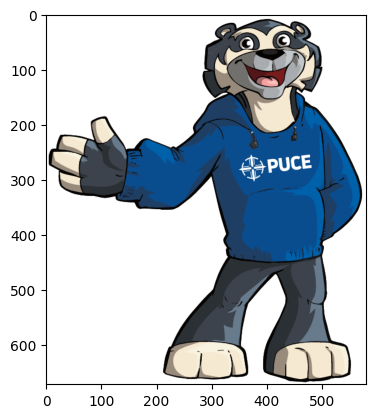

In [2]:
img = plt.imread('aurelio.png')
print(img.shape)
plt.imshow(img)
plt.show()

Reducimos eliminando filas y columnas, saltando una:

(336, 291, 3)


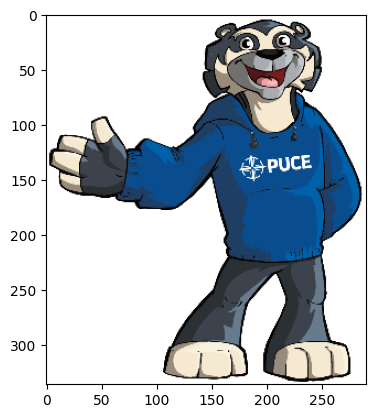

In [84]:
img_reducida = img[::2, ::2, :]
print(img_reducida.shape)
plt.imshow(img_reducida)
plt.show()

Recostruimos la imagen con interpolación lineal:

(671, 581, 3)


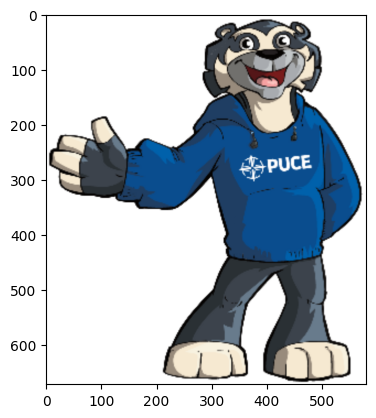

In [85]:
img_ampliada =cv2.resize(img_reducida, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_LINEAR)
print(img_ampliada.shape)
plt.imshow(img_ampliada)
plt.show()

Podemos probar otros tipos de interpolación:
- cv2.INTER_NEAREST
- cv2.INTER_LINEAR
- cv2.INTER_AREA
- cv2.INTER_CUBIC
- cv2.INTER_LANCZOS4

(671, 581, 3)


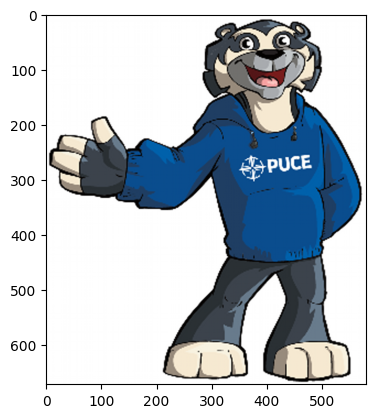

In [86]:
img_ampliada =cv2.resize(img_reducida, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
print(img_ampliada.shape)
plt.imshow(img_ampliada)
plt.show()

---
## <font color='264CC7'> Filtros</font>
---

Leemos la imagen:

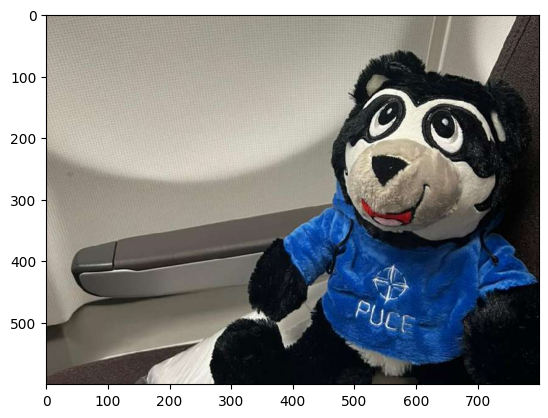

In [87]:
img = plt.imread('OsoAurelio.jpg')
plt.imshow(img)
plt.show()

Aplicamos el flitro dado por la siguiente matriz
$$
    \begin{pmatrix}
    -2 & -1 & 0 \\
    -1 & 1 & 1 \\
    0 & 1 & 1   
    \end{pmatrix}.
$$

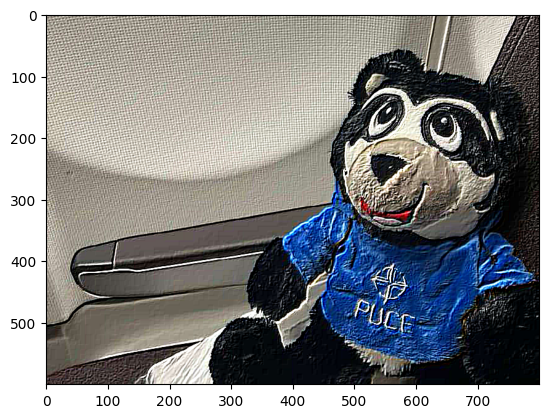

In [88]:
filtro = np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ])

img_f1 = cv2.filter2D(img, kernel=filtro, ddepth=-1)

plt.imshow(img_f1)
plt.show()

Probamos con otros filtros:
$$
    \begin{pmatrix}
    -1 & -1 & -1 \\
    0 & 0 & 0 \\
    1 & 1 & 1   
    \end{pmatrix};
    \quad
    \begin{pmatrix}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1
    \end{pmatrix}.
$$

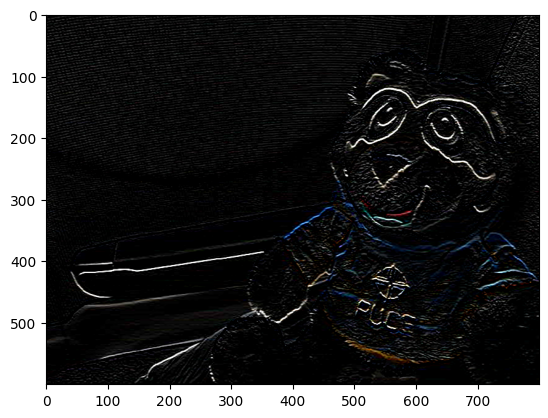

In [89]:
filtro = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])

img_f2 = cv2.filter2D(img, kernel=filtro, ddepth=-1)

plt.imshow(img_f2)
plt.show()

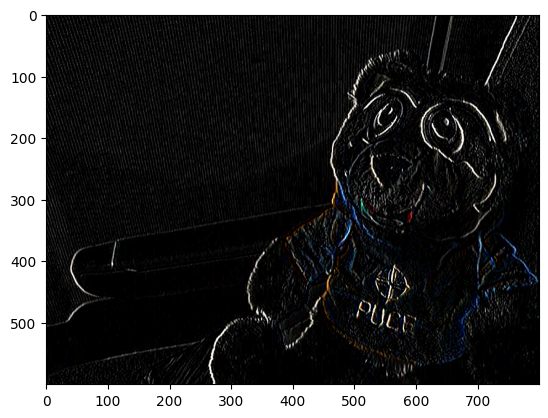

In [90]:
filtro = np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])

img_f2 = cv2.filter2D(img, kernel=filtro, ddepth=-1)

plt.imshow(img_f2)
plt.show()

---
## <font color='264CC7'> Redes convolucionales</font>
---

In [91]:
# Paquetes necesarios
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

### <font color='264CC7'> Lectura de datos</font>

In [92]:
# Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

# Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_train, datos_test = datos['train'], datos['test']

Revisamos el tipo de datos:

In [93]:
datos_train.take(1).element_spec

(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Visualizamos los datos:

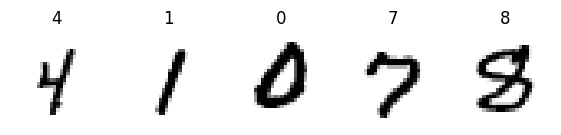

In [94]:
plt.figure(figsize=(7,7))

for i, (imagen, etiqueta) in enumerate(datos_train.take(5)):
    imagen = imagen.numpy()
    plt.subplot(5,5,i+1)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.title(etiqueta.numpy())
    plt.axis('off')
plt.show()

Preparamos los datos en lotes:

In [95]:
# Cantidad de datos de entrenamiento
num_datos_train = metadatos.splits["train"].num_examples
print("Imagenes de entrenamiento:", num_datos_train)

# Coloco en lotes
datos_train = datos_train.repeat().shuffle(num_datos_train).batch(32)
datos_test = datos_test.batch(32)

Imagenes de entrenamiento: 60000


### <font color='264CC7'> Redes densa</font>

Definimos la red:

In [96]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modelo.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo:

In [97]:
modelo.fit(
    datos_train,
    epochs=2,
    steps_per_epoch=num_datos_train//32
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7714 - loss: 4.3584
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9036 - loss: 0.4142


Visualizamos los resultados:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


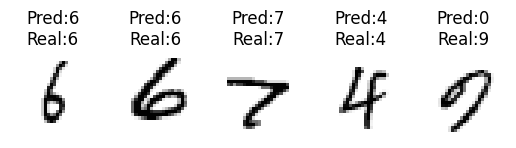

In [98]:
for i, (imagenes, etiquetas_reales) in enumerate(datos_test.take(1)):
    # Hacer predicciones
    predicciones = modelo.predict(imagenes)

    for j in range(5):
        imagen = imagenes[j+26].numpy()
        plt.subplot(1, 5, j+1)
        plt.imshow(imagen, cmap=plt.cm.binary)
        plt.title(f"Pred:{tf.argmax(predicciones[j+26]).numpy()}\nReal:{etiquetas_reales[j+26].numpy()}")
        plt.axis('off')
    plt.show()

Evaluamos el modelo:

In [99]:
# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(datos_test)

# resultado[0] es la pérdida, resultado[1] es la precisión
print(f'Precisión en el conjunto de prueba: {resultado[1]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8991 - loss: 0.3765
Precisión en el conjunto de prueba: 0.8965


### <font color='264CC7'> Redes convolucional</font>

Defimos la red:

In [100]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modelo.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,834 (30.60 KB)

 Trainable params: 7,834 (30.60 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo:

In [101]:
modelo.fit(
    datos_train,
    epochs=2,
    steps_per_epoch=num_datos_train//32
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.4560 - loss: 2.8313
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9317 - loss: 0.2478


Visualizamos los resultados:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


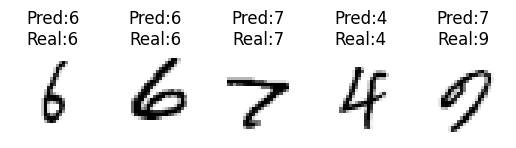

In [102]:
for i, (imagenes, etiquetas_reales) in enumerate(datos_test.take(1)):
    # Hacer predicciones
    predicciones = modelo.predict(imagenes)

    for j in range(5):
        imagen = imagenes[j+26].numpy()
        plt.subplot(1, 5, j+1)
        plt.imshow(imagen, cmap=plt.cm.binary)
        plt.title(f"Pred:{tf.argmax(predicciones[j+26]).numpy()}\nReal:{etiquetas_reales[j+26].numpy()}")
        plt.axis('off')
    plt.show()

Evaluamos el modelo:

In [103]:
# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(datos_test)

# resultado[0] es la pérdida, resultado[1] es la precisión
print(f'Precisión en el conjunto de prueba: {resultado[1]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9549 - loss: 0.1539
Precisión en el conjunto de prueba: 0.9573


### <font color='264CC7'> Otros conjuntos de datos: cifar10</font>

In [104]:
# Descargar set de datos de cifar10
datos, metadatos = tfds.load('cifar10', as_supervised=True, with_info=True)

# Obtener en variables separadas los datos de entrenamiento y pruebas
datos_train, datos_test = datos['train'], datos['test']

Categories = ["airp.", "auto.", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Revisamos el tipo de datos:

In [105]:
datos_train.take(1).element_spec

(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Visualizamos los datos:

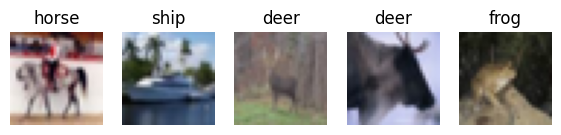

In [106]:
plt.figure(figsize=(7,7))

for i, (imagen, etiqueta) in enumerate(datos_train.take(5)):
    imagen = imagen.numpy()
    plt.subplot(5,5,i+1)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.title(Categories[etiqueta.numpy()])
    plt.axis('off')
plt.show()

Preparamos los datos en lotes:

In [107]:
# Cantidad de datos de entrenamiento
num_datos_train = metadatos.splits["train"].num_examples
print("Imagenes de entrenamiento:", num_datos_train)

# Coloco en lotes
datos_train = datos_train.repeat().shuffle(num_datos_train).batch(32)
datos_test = datos_test.batch(32)

Imagenes de entrenamiento: 50000


### <font color='264CC7'> Redes densa</font>

Definimos la red:

In [108]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(units=1000, activation='relu'),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modelo.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1000)                │       3,073,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,578,510 (13.65 MB)

 Trainable params: 3,578,510 (13.65 MB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo:

In [109]:
modelo.fit(
    datos_train,
    epochs=2,
    steps_per_epoch=num_datos_train//32
)

Epoch 1/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 95s 56ms/step - accuracy: 0.2077 - loss: 94.6069
Epoch 2/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.2876 - loss: 2.0546


Visualizamos los resultados:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


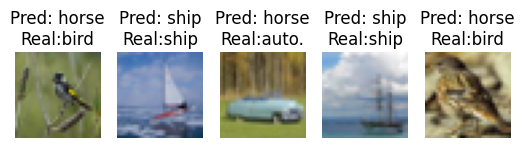

In [110]:
for i, (imagenes, etiquetas_reales) in enumerate(datos_test.take(1)):
    # Hacer predicciones
    predicciones = modelo.predict(imagenes)

    for j in range(5):
        imagen = imagenes[j+26].numpy()
        plt.subplot(1, 5, j+1)
        plt.imshow(imagen, cmap=plt.cm.binary)
        plt.title(f"Pred: {Categories[tf.argmax(predicciones[j+26]).numpy()]}\nReal:{Categories[etiquetas_reales[j+26].numpy()]}")
        plt.axis('off')
    plt.show()

Evaluamos el modelo:

In [111]:
# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(datos_test)

# resultado[0] es la pérdida, resultado[1] es la precisión
print(f'Precisión en el conjunto de prueba: {resultado[1]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3144 - loss: 1.9543
Precisión en el conjunto de prueba: 0.3096


### <font color='264CC7'> Redes convolucional</font>

Defimos la red:

In [112]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modelo.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 100)                 │         230,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,902 (980.09 KB)

 Trainable params: 250,902 (980.09 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo:

In [113]:
historial = modelo.fit(
    datos_train,
    epochs=2,
    steps_per_epoch=num_datos_train//32
)

Epoch 1/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.2808 - loss: 4.6840
Epoch 2/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4914 - loss: 1.4110


Visualizamos los resultados:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


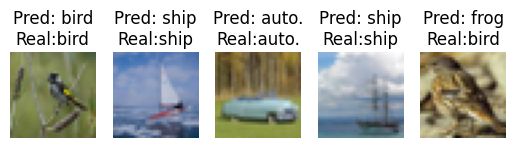

In [114]:
for i, (imagenes, etiquetas_reales) in enumerate(datos_test.take(1)):
    # Hacer predicciones
    predicciones = modelo.predict(imagenes)

    for j in range(5):
        imagen = imagenes[j+26].numpy()
        plt.subplot(1, 5, j+1)
        plt.imshow(imagen, cmap=plt.cm.binary)
        plt.title(f"Pred: {Categories[tf.argmax(predicciones[j+26]).numpy()]}\nReal:{Categories[etiquetas_reales[j+26].numpy()]}")
        plt.axis('off')
    plt.show()

Evaluamos el modelo:

In [115]:
# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(datos_test)

# resultado[0] es la pérdida, resultado[1] es la precisión
print(f'Precisión en el conjunto de prueba: {resultado[1]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5643 - loss: 1.2443
Precisión en el conjunto de prueba: 0.5600


---
## <font color='264CC7'> Uso de redes pre-entrenadas</font>
---

Cargamos el modelo yolov8.

In [117]:
! pip install ultralytics
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 18.9 MB/s eta 0:00:00


100%|██████████| 6.25M/6.25M [00:00<00:00, 106MB/s]


Leemos una imagen:

In [118]:
img = plt.imread('OsoAurelio.jpg')

Realizamos una predicción:


0: 480x640 1 dog, 1 teddy bear, 444.0ms
Speed: 19.9ms preprocess, 444.0ms inference, 34.9ms postprocess per image at shape (1, 3, 480, 640)


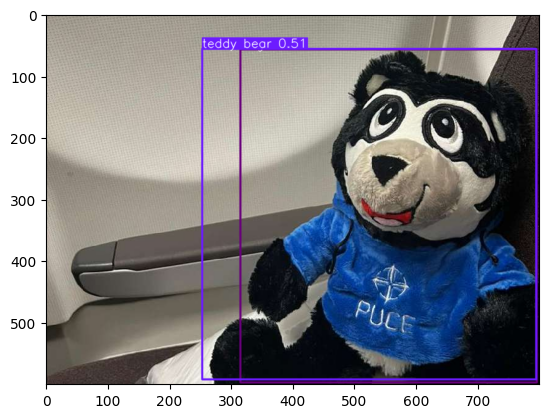

In [119]:
model = YOLO('yolov8n.pt')
results = model(img)

plt.imshow(results[0].plot())
plt.show()